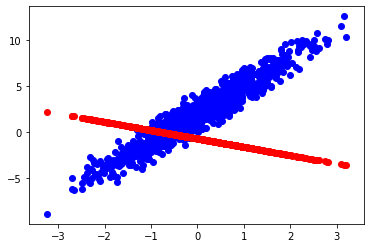

현재 손실: 
23.797497
에포크  0: W=0.31 b=0.24, 손실=11.40242
에포크  1: W=0.86 b=0.60, 손실=7.49828
에포크  2: W=1.30 b=0.89, 손실=5.04412
에포크  3: W=1.65 b=1.12, 손실=3.50141
에포크  4: W=1.92 b=1.30, 손실=2.53164
에포크  5: W=2.14 b=1.44, 손실=1.92202
에포크  6: W=2.31 b=1.56, 손실=1.53880
에포크  7: W=2.45 b=1.65, 손실=1.29790
에포크  8: W=2.55 b=1.72, 손실=1.14646
에포크  9: W=2.64 b=1.78, 손실=1.05126
에포크 10: W=2.71 b=1.82, 손실=0.99141
에포크 11: W=2.76 b=1.86, 손실=0.95379
에포크 12: W=2.80 b=1.89, 손실=0.93014
에포크 13: W=2.84 b=1.91, 손실=0.91527
에포크 14: W=2.86 b=1.93, 손실=0.90592
에포크 15: W=2.89 b=1.94, 손실=0.90004
에포크 16: W=2.90 b=1.95, 손실=0.89635
에포크 17: W=2.92 b=1.96, 손실=0.89402
에포크 18: W=2.93 b=1.97, 손실=0.89256
에포크 19: W=2.93 b=1.98, 손실=0.89165
에포크 20: W=2.94 b=1.98, 손실=0.89107
에포크 21: W=2.95 b=1.98, 손실=0.89071
에포크 22: W=2.95 b=1.99, 손실=0.89048
에포크 23: W=2.95 b=1.99, 손실=0.89033
에포크 24: W=2.96 b=1.99, 손실=0.89024
에포크 25: W=2.96 b=1.99, 손실=0.89019
에포크 26: W=2.96 b=1.99, 손실=0.89015
에포크 27: W=2.96 b=2.00, 손실=0.89013
에포크 28: W=2.96 b=2.00, 손실=0.8

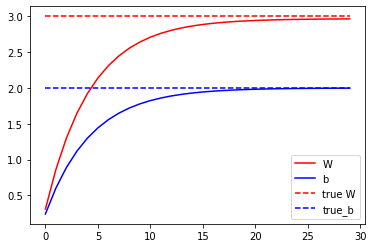

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt

class Model(object):
  def __init__(self):
    # 변수를 (5.0, 0.0)으로 초기화 합니다.
    # 실제로는 임의의 값으로 초기화 되어야합니다.
    self.W = tf.Variable(tf.random.normal([1]))
    self.b = tf.Variable(tf.random.normal([1]))

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

#assert model(3.0).numpy() == 15.0

def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('현재 손실: '),
print(loss(model(inputs), outputs).numpy())

def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

model = Model()

# 도식화를 위해 W값과 b값의 변화를 저장합니다.
Ws, bs = [], []
# 얼마나 돌려줄지 결정
epochs = range(30)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('에포크 %2d: W=%1.2f b=%1.2f, 손실=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# 저장된 값들을 도식화합니다.
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()